In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Load data

In [15]:
df = pd.read_csv("development.csv")

print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nHead:")
display(df.head())

Rows, Columns: (79997, 7)

Columns: ['Id', 'source', 'title', 'article', 'page_rank', 'timestamp', 'label']

Head:


,Id,source,title,article,page_rank,timestamp,label
0,0,AllAfrica.com,OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd,THE Organisation of Petroleum Exporting Countr...,5,2004-09-16 22:39:53,5
1,1,Xinhua,Yearender: Mideast peace roadmap reaches dead-...,Looking back at the major events that took pla...,5,2004-12-17 19:01:14,0
2,2,Yahoo,Battleground Dispatches for Oct. 5 \\n (CQP...,CQPolitics.com - Here are today's Battleground...,5,2006-10-05 18:42:29,0
3,3,BBC,Air best to resuscitate newborns,Air rather than oxygen should be used to resus...,5,0000-00-00 00:00:00,0
4,4,Yahoo,High tech German train crash kills at least on...,"<p><a href=""http://us.rd.yahoo.com/dailynews/r...",5,2006-09-22 17:28:57,0


2) Basic checks

In [16]:
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nLabel distribution (counts):")
label_counts = df["label"].value_counts().sort_index()
print(label_counts)

print("\nLabel distribution (%):")
print((label_counts / len(df) * 100).round(2))


Missing values per column:
title        1
article      1
Id           0
source       0
page_rank    0
timestamp    0
label        0
dtype: int64

Label distribution (counts):
label
0    23542
1    10588
2    11161
3     9977
4     8574
5    13053
6     3102
Name: count, dtype: int64

Label distribution (%):
label
0    29.43
1    13.24
2    13.95
3    12.47
4    10.72
5    16.32
6     3.88
Name: count, dtype: float64


Plot class balance

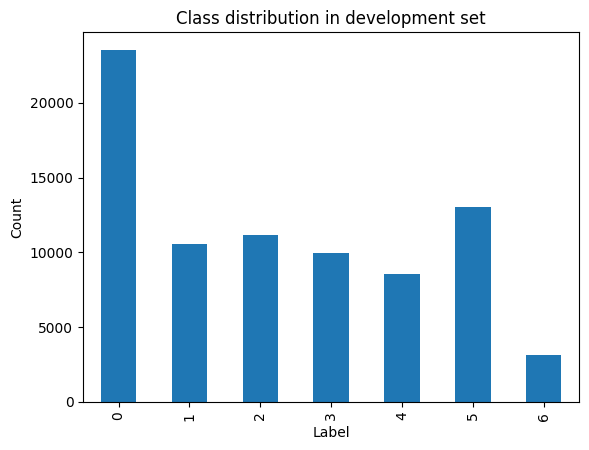

In [17]:
plt.figure()
label_counts.plot(kind="bar")
plt.title("Class distribution in development set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

3) Text length analysis (like “recording durations differ”)
If title/article can have NaNs, fill them with empty string


In [18]:
df["title"] = df["title"].fillna("")
df["article"] = df["article"].fillna("")

df["title_len_chars"] = df["title"].str.len()
df["article_len_chars"] = df["article"].str.len()

df["title_len_words"] = df["title"].str.split().apply(len)
df["article_len_words"] = df["article"].str.split().apply(len)

print("\nTitle length (words) summary:")
print(df["title_len_words"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

print("\nArticle length (words) summary:")
print(df["article_len_words"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


Title length (words) summary:
count    79997.000000
mean         6.994175
std          2.256556
min          0.000000
50%          7.000000
90%         10.000000
95%         11.000000
99%         13.000000
max         45.000000
Name: title_len_words, dtype: float64

Article length (words) summary:
count    79997.000000
mean        35.769879
std         39.438934
min          0.000000
50%         30.000000
90%         59.000000
95%         86.000000
99%        128.000000
max       1888.000000
Name: article_len_words, dtype: float64


In [19]:
df["title"] = df["title"].fillna("")
df["article"] = df["article"].fillna("")

df["title_len_chars"] = df["title"].str.len()
df["article_len_chars"] = df["article"].str.len()

df["title_len_words"] = df["title"].str.split().apply(len)
df["article_len_words"] = df["article"].str.split().apply(len)

print("\nTitle length (words) summary:")
print(df["title_len_words"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

print("\nArticle length (words) summary:")
print(df["article_len_words"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


Title length (words) summary:
count    79997.000000
mean         6.994175
std          2.256556
min          0.000000
50%          7.000000
90%         10.000000
95%         11.000000
99%         13.000000
max         45.000000
Name: title_len_words, dtype: float64

Article length (words) summary:
count    79997.000000
mean        35.769879
std         39.438934
min          0.000000
50%         30.000000
90%         59.000000
95%         86.000000
99%        128.000000
max       1888.000000
Name: article_len_words, dtype: float64


Plot distributions (log scale helps with long-tail text lengths)

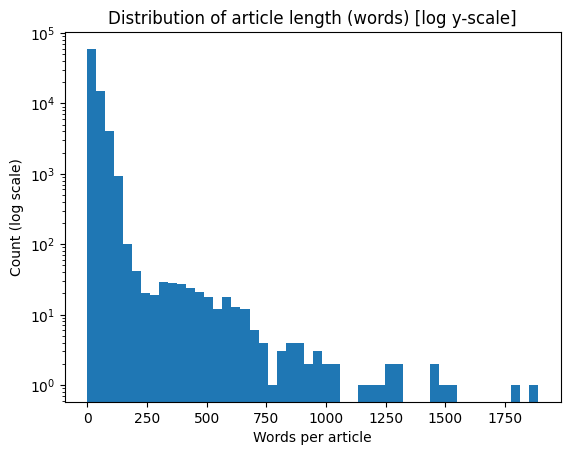

In [20]:
plt.figure()
plt.hist(df["article_len_words"], bins=50)
plt.yscale("log")
plt.title("Distribution of article length (words) [log y-scale]")
plt.xlabel("Words per article")
plt.ylabel("Count (log scale)")
plt.show()

Identify very short / very long outliers

In [21]:
short_articles = (df["article_len_words"] < 20).sum()
long_articles = (df["article_len_words"] > df["article_len_words"].quantile(0.99)).sum()


print(f"\nVery short articles (<20 words): {short_articles}")
print(f"Very long articles (>99th percentile): {long_articles}")


Very short articles (<20 words): 14926
Very long articles (>99th percentile): 776


Showing a few extreme examples

In [25]:
print("\nExamples of shortest articles:")
display(df.sort_values("article_len_words")[["Id", "title", "article_len_words"]].head(5))

print("\nExamples of longest articles:")
display(df.sort_values("article_len_words", ascending=False)[["Id", "title", "article_len_words"]].head(5))


Examples of shortest articles:


,Id,title,article_len_words
15302,15302,Utah Breaks Four-Year Losing Streak to Indiana,0
47900,47900,Photo gallery: iPod gets the picture,0
67803,67803,Statement by Former Central Intelligence Dire...,0
53004,53004,"20,000 more H1-B visas",0
36842,36842,Apple may go galactic,0



Examples of longest articles:


,Id,title,article_len_words
50498,50498,Interview: Bechtolsheim hails open-source moves,1888
45407,45407,The cloudy future of mobile Linux,1794
57142,57142,Take home more tech pay in 2008,1520
71092,71092,How the wireless spectrum auction could change...,1486
32281,32281,Presidential candidates stake out tech positions,1461


Source / publisher analysis


Top 10 sources:
source
Yahoo         15850
Reuters       11915
BBC            7971
New            6430
Washington     3383
RedNova        2701
Boston         1807
CNN            1802
CNET           1369
Topix.Net      1331
Name: count, dtype: int64


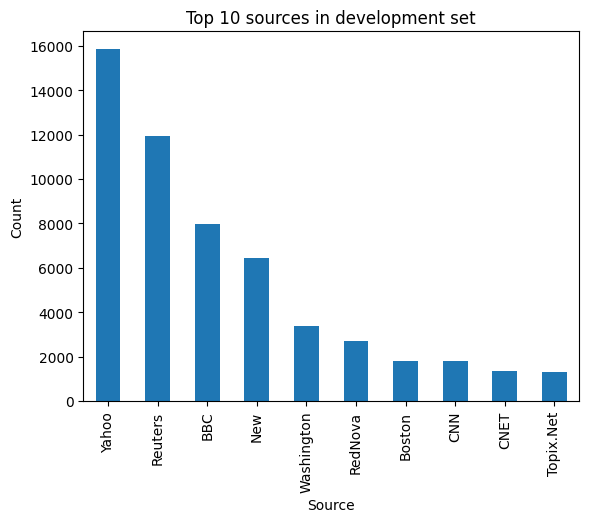

In [26]:
if "source" in df.columns:
    top_sources = df["source"].value_counts().head(10)
    print("\nTop 10 sources:")
    print(top_sources)

    plt.figure()
    top_sources.plot(kind="bar")
    plt.title("Top 10 sources in development set")
    plt.xlabel("Source")
    plt.ylabel("Count")
    plt.show()

Timestamp analysis (if present)


Timestamp parsing success rate: 0.653

Timestamp range (UTC):
2004-08-18 02:45:46+00:00 -> 2008-02-20 21:52:30+00:00


/var/folders/lc/8m5m87096psf__9xjyytlnvw0000gn/T/ipykernel_70496/1027613319.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ts["month"] = ts["timestamp_parsed"].dt.to_period("M").dt.to_timestamp()


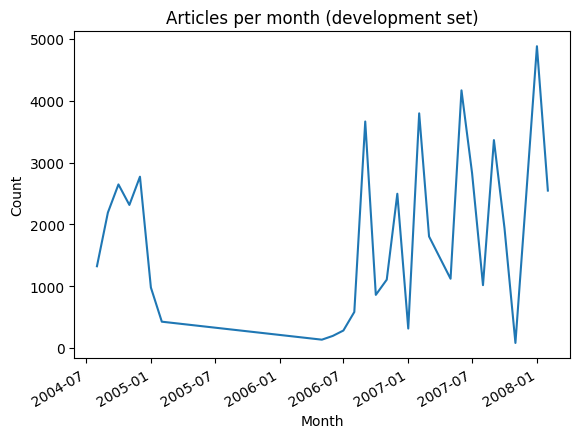

In [28]:
if "timestamp" in df.columns:
    # robust parse
    df["timestamp_parsed"] = pd.to_datetime(df["timestamp"], errors="coerce", utc=True)
    print("\nTimestamp parsing success rate:",
          df["timestamp_parsed"].notna().mean().round(3))

    # basic range
    print("\nTimestamp range (UTC):")
    print(df["timestamp_parsed"].min(), "->", df["timestamp_parsed"].max())

    # articles over time (monthly)
    ts = df.dropna(subset=["timestamp_parsed"]).copy()
    ts["month"] = ts["timestamp_parsed"].dt.to_period("M").dt.to_timestamp()
    monthly_counts = ts.groupby("month").size()

    plt.figure()
    monthly_counts.plot()
    plt.title("Articles per month (development set)")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.show()


Page rank quick look (if present)


Page_rank summary:
count    79997.000000
mean         4.892958
std          0.397603
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: page_rank, dtype: float64


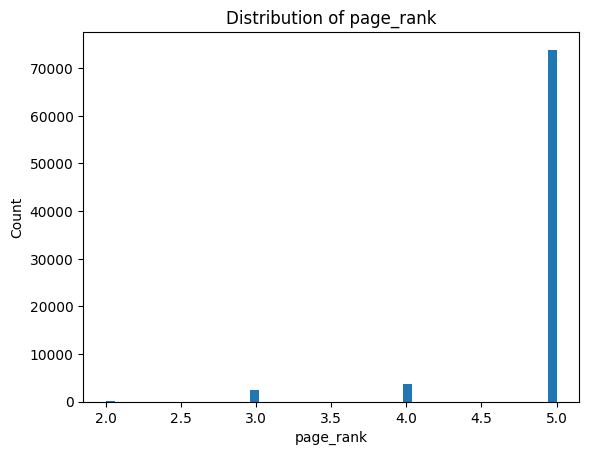

In [29]:
if "page_rank" in df.columns:
    print("\nPage_rank summary:")
    print(df["page_rank"].describe())

    plt.figure()
    plt.hist(df["page_rank"].dropna(), bins=50)
    plt.title("Distribution of page_rank")
    plt.xlabel("page_rank")
    plt.ylabel("Count")
    plt.show()